<a href="https://colab.research.google.com/github/tahminehladi/NLP_25classes_symptoms/blob/main/Sentiment_Analysis_SymptomsDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('/content/Mydrive/MyDrive/TensorFlow_data/Symptom2Disease.csv')
df.head(5)

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [3]:
df= df.drop ('Unnamed: 0', axis=1)
df.head(5)

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1200 non-null   object
 1   text    1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [5]:
df.label.value_counts()

,count
label,
Psoriasis,50
Varicose Veins,50
peptic ulcer disease,50
drug reaction,50
gastroesophageal reflux disease,50
allergy,50
urinary tract infection,50
Malaria,50
Jaundice,50


In [6]:
# number of classes in label column
len(df.label.unique())

24

In [7]:
# check the duplicates and missing values

print ('Number of data in the df dataset:', df.shape[0] )
print ('Number of duplicates:', len(df[df.duplicated()]))
print ('Number of missing values in each column:\n', df.isnull().sum())

Number of data in the df dataset: 1200
Number of duplicates: 47
Number of missing values in each column:
 label    0
text     0
dtype: int64


In [8]:
# review duplicates
duplicates=df[df.duplicated(keep=False)]
sorted_duplicates= duplicates.sort_values(by=list(duplicates.columns))
sorted_duplicates.head(20)

,label,text
556,Acne,A nasty rash has just appeared on my skin. Bla...
563,Acne,A nasty rash has just appeared on my skin. Bla...
560,Acne,A skin rash with several pus-filled pimples an...
580,Acne,A skin rash with several pus-filled pimples an...
569,Acne,I just developed a really nasty rash on my ski...
573,Acne,I just developed a really nasty rash on my ski...
570,Acne,I've been dealing with a really nasty rash on ...
574,Acne,I've been dealing with a really nasty rash on ...
524,Arthritis,I've been experiencing stiffness and weakness ...
526,Arthritis,I've been experiencing stiffness and weakness ...


In [9]:
# Drop duplicates
df=df.drop_duplicates()
len(df[df.duplicated()])

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1153 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1153 non-null   object
 1   text    1153 non-null   object
dtypes: object(2)
memory usage: 27.0+ KB


In [11]:
# view random samples for each category
def random_samples( df, num_samples):
  samples= df.groupby('label')['text'].apply(lambda x: x.sample(num_samples))
  samples_df= samples.reset_index()
  return samples_df
pd.set_option('display.max_colwidth', 50) # display up to 50 characters
samples= random_samples(df, num_samples=2)
samples.head(10)

,label,level_1,text
0,Acne,569,I just developed a really nasty rash on my ski...
1,Acne,596,"When I awoke this morning, I saw a severe rash..."
2,Arthritis,533,I've been experiencing muscular weakness and s...
3,Arthritis,542,I've been experiencing stiffness and weakness ...
4,Bronchial Asthma,617,"I've been having breathing issues, a persisten..."
5,Bronchial Asthma,601,"I've got a cough that won't go away, and I'm e..."
6,Cervical spondylosis,777,"Back pain, a persistent cough, and arm and leg..."
7,Cervical spondylosis,768,"Back pain, a chronic cough, and muscle weaknes..."
8,Chicken pox,153,I've lost my appetite and can't seem to eat an...
9,Chicken pox,150,I've been experiencing intense itching all ove...


In [12]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 8.6 MB/s eta 0:00:00


In [13]:
import re
import string
import emoji
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import nltk
nltk.download ('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_pattern(text):
  text=re.sub(r'http\S+|www\S+|https\S+', '', text) # remove urls
  text=re.sub(r'@\w+|#\w+', '', text) # remove @username, #hashtag
  text=re.sub(r'\[.*?\]\(.*?\)', '', text) # remove [text](url)
  text=text.translate(str.maketrans('','', string.punctuation))
  # text=re.sub(r'[^\w\s]', '', text) no need, because I am using string.punctuation
  text=emoji.replace_emoji(text, replace='')
  text=re.sub(r'\s+', ' ', text) # replace multiple spaces with single space
  # stemming and stopword removal
  words=text.split()
  filtered_words=[ps.stem(word) for word in words if word.lower() not in stop_words]
  text=' '.join(filtered_words)

  return text.strip()

df['cleaned_text']=df['text'].apply(remove_pattern)
df.head(20)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,text,cleaned_text
0,Psoriasis,I have been experiencing a skin rash on my arm...,experienc skin rash arm leg torso past week re...
1,Psoriasis,"My skin has been peeling, especially on my kne...",skin peel especi knee elbow scalp peel often a...
2,Psoriasis,I have been experiencing joint pain in my fing...,experienc joint pain finger wrist knee pain of...
3,Psoriasis,"There is a silver like dusting on my skin, esp...",silver like dust skin especi lower back scalp ...
4,Psoriasis,"My nails have small dents or pits in them, and...",nail small dent pit often feel inflammatori te...
5,Psoriasis,The skin on my palms and soles is thickened an...,skin palm sole thicken deep crack crack pain b...
6,Psoriasis,"The skin around my mouth, nose, and eyes is re...",skin around mouth nose eye red inflam often it...
7,Psoriasis,My skin is very sensitive and reacts easily to...,skin sensit react easili chang temperatur humi...
8,Psoriasis,I have noticed a sudden peeling of skin at dif...,notic sudden peel skin differ part bodi mainli...
9,Psoriasis,The skin on my genitals is red and inflamed. I...,skin genit red inflam often itchi burn uncomfo...


In [22]:
# calculate the length of each text in text
df['text_length']=[len(text.split()) for text in df.cleaned_text]

# find the 95th quartile
quartile_95= np.percentile(df.text_length, 95)
print('95th quartile of text length:', quartile_95)

95th quartile of text length: 23.0


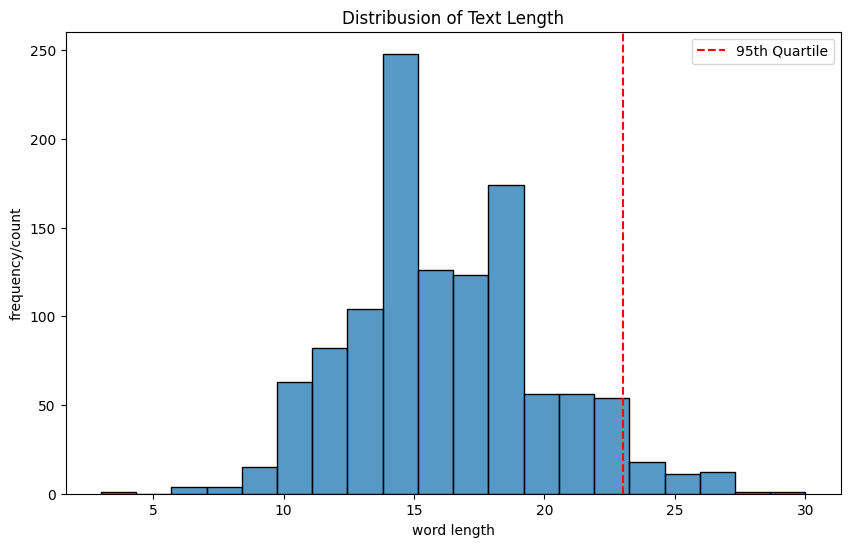

In [23]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df.text_length, bins=20)
plt.xlabel('word length')
plt.ylabel('frequency/count')
plt.title('Distribusion of Text Length')


# adding a vertcal line for 95th quartile

plt.axvline(x=quartile_95, color='red', linestyle='--', label='95th Quartile')
plt.legend()

plt.show()

In [24]:
df.text_length.describe()

,text_length
count,1153.000000
mean,16.208153
std,3.684149
min,3.000000
25%,14.000000
50%,16.000000
75%,18.000000
max,30.000000


In [27]:
df[df['text_length']< 8]

,label,text,cleaned_text,text_length
72,Varicose Veins,I have noticed that there are bruises on my le...,notic bruis leg cannot explain pain concern,7
705,Migraine,"I have been feeling excessively hungry, even a...",feel excess hungri even eat stiff neck,7
708,Migraine,"I have been feeling depressed and irritable, a...",feel depress irrit notic chang vision,6
713,Migraine,In addition to having a stiff neck and eye iss...,addit stiff neck eye issu alway hungri,7
916,urinary tract infection,I have been having pain in my bladder and have...,pain bladder get,3


In [28]:
# shuffle training dataframe
df=df.sample(frac=1, random_state=42)
df.head(5)

,label,text,cleaned_text,text_length
794,Cervical spondylosis,"I've had back pain, a cough that won't go away...",ive back pain cough wont go away limb weak ive...,16
466,Dimorphic Hemorrhoids,"Recently, I've been having problems using the ...",recent ive problem use restroom go incred diff...,21
814,Jaundice,I've been exhausted and experiencing nausea an...,ive exhaust experienc nausea itch addit ive lo...,19
615,Bronchial Asthma,"I've had a nagging cough that won't go away, a...",ive nag cough wont go away breath becom labor ...,21
390,Common Cold,I've been quite exhausted and ill. My throat h...,ive quit exhaust ill throat quit pain ive fair...,24


In [29]:
df.label.value_counts()

,count
label,
allergy,50
urinary tract infection,50
peptic ulcer disease,50
Psoriasis,50
drug reaction,50
Impetigo,50
Varicose Veins,50
Fungal infection,50
Typhoid,50


In [30]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['label_encoded']=encoder.fit_transform(df['label'])
label_mapping=dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))


In [31]:
# check the labels and thier encoded labels:

data={
    'label': list(label_mapping.keys()),
    'label_encoded': list(label_mapping.values())
}
dr=pd.DataFrame(data)
dr

# so 0 in label_encoded referes to Acne and etc.

,label,label_encoded
0,Acne,0
1,Arthritis,1
2,Bronchial Asthma,2
3,Cervical spondylosis,3
4,Chicken pox,4
5,Common Cold,5
6,Dengue,6
7,Dimorphic Hemorrhoids,7
8,Fungal infection,8
9,Hypertension,9


In [32]:
class_names=dr.label.to_list()
class_names

['Acne',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Common Cold',
 'Dengue',
 'Dimorphic Hemorrhoids',
 'Fungal infection',
 'Hypertension',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Pneumonia',
 'Psoriasis',
 'Typhoid',
 'Varicose Veins',
 'allergy',
 'diabetes',
 'drug reaction',
 'gastroesophageal reflux disease',
 'peptic ulcer disease',
 'urinary tract infection']

In [33]:
num_classes=len(class_names)
num_classes

24

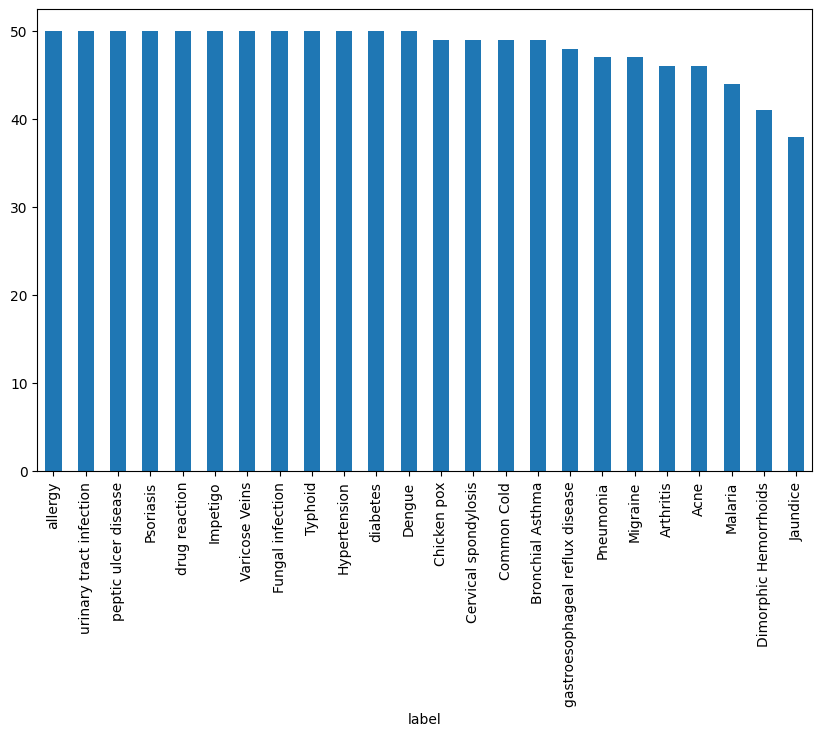

In [53]:
# visualize the distribution of labels

plt.figure(figsize=(10,6))
df.label.value_counts().plot(kind='bar')
plt.show()

In [55]:
# data balancing, overcome the minority classes by creating synthetic samples

from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler()
train_X, train_y= ros.fit_resample(np.array(df['cleaned_text']).reshape(-1, 1), np.array(df['label_encoded']).reshape(-1,1));
train_os=pd.DataFrame(list(zip([x[0] for x in train_X], train_y)),
                      columns=['cleaned_text', 'label_encoded'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [56]:
train_os.head()

,cleaned_text,label_encoded
0,ive back pain cough wont go away limb weak ive...,3
1,recent ive problem use restroom go incred diff...,7
2,ive exhaust experienc nausea itch addit ive lo...,11
3,ive nag cough wont go away breath becom labor ...,2
4,ive quit exhaust ill throat quit pain ive fair...,5


In [57]:
train_os.label_encoded.value_counts()

,count
label_encoded,
3,50
7,50
22,50
4,50
15,50
0,50
17,50
1,50
16,50


In [61]:
# split data

from sklearn.model_selection import train_test_split

X=train_os['cleaned_text']
y=train_os['label_encoded']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((960,), (240,), (960,), (240,))

In [62]:
# copying the original encoded labels to new variables

y_train_le=y_train.copy()
y_valid_le=y_valid.copy()

# one hot encode labels( One-hot encoding is used to represent categorical variables as binary vectors.
#This is important when working with multi-class classification problems.)

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder= OneHotEncoder(sparse_output=False)
y_train=one_hot_encoder.fit_transform(np.array(y_train).reshape(-1,1)) # np.array: Converts y_train and y_valid into NumPy arrays if they are not already in that format.
y_valid=one_hot_encoder.transform(np.array(y_valid).reshape(-1,1)) # reshape(-1,1) refers to (n_samples, n_features), transforms a 1D array ([0,1,2]) into a 2D column vector ([0],[1], [2])

y_train.shape, y_valid.shape

((960, 24), (240, 24))

In [63]:
y_train, y_valid

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [66]:
# average number of tokens (words) in training texts

round(sum([len(word.split()) for word in X_train])/len(X_train))

16

In [65]:
len(X_train)

960

In [90]:
# find the 98th percentile
text_length_train=[len(text.split()) for text in X_train]

percentile_98=np.percentile(text_length_train, 98)
print(f"98th Percentile of Text Lengths: {round(percentile_98)}")

98th Percentile of Text Lengths: 25


In [84]:
max_text_length= max(text_length_train)
print('Max text length in X_train:', max_text_length)


Max text length in X_train: 28


In [91]:
# TextVectorization (is used to convert text data into sequences of integers, which can be fed into a neural network model.)

import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# setup text vecorization
max_vocab_length=None #max number of words to have in our vocab
max_length= round(percentile_98)

text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                  output_mode='int',
                                  output_sequence_length=max_length)

text_vectorizer.adapt(X_train)

In [92]:
words_in_vocab=text_vectorizer.get_vocabulary()
top5_words=words_in_vocab[:5]
top5_words

['', '[UNK]', 'ive', 'feel', 'also']

In [93]:
less5_words=words_in_vocab[-5:]
less5_words

['across', 'acquir', 'acompani', 'achi', 'abrupt']

In [94]:
len(words_in_vocab), max_length

(1065, 25)

# Model_0: Baseline
Define a  simple baseline model using a TF-IDF vectorizer and a multinomial Naive Bayes classifier within a Scikit-Learn pipeline.

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0= Pipeline([
                  ('tfidf', TfidfVectorizer()),
                  ('clf', MultinomialNB())
                   ])

model_0.fit(X_train, y_train_le)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [97]:
baseline_score=model_0.score(X_valid, y_valid_le)
print('model_0 accuracy:', baseline_score)

model_0 accuracy: 0.9333333333333333


In [101]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluation_results(y_true, y_pred):
  model_accuracy=accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_f1, _= precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results={'accuracy': model_accuracy,
                 'precision': model_precision,
                 'recall': model_recall,
                 'f1': model_f1}

  return model_results


In [103]:
baseline_preds=model_0.predict(X_valid)
baseline_results= evaluation_results(y_true=y_valid_le,
                                    y_pred=baseline_preds)
baseline_results

{'accuracy': 0.9333333333333333,
 'precision': 0.9530664532227032,
 'recall': 0.9333333333333333,
 'f1': 0.9292532152285723}

In [104]:
# create a helper function to compare the baseline results to new model results
def compare_baseline_to_new_model(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f'Baseline {key}: {value:.2f}, New{key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}')


In [105]:
# create Prefetch Dataset to prepare the data for Tensorflow model training, optimizing efficiency and preformance during the training process.
# turn data into Tensorflow datasets
train_dataset=tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_dataset=tf.data.Dataset.from_tensor_slices((X_valid, y_valid))

# turn the tensorflow datasets into prefetched batchs
train_dataset= train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset=valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [106]:
# define a ModelCheckpoint callback to save the best model during training based on validation accuracy

from tensorflow.keras.callbacks import ModelCheckpoint

def creat_checkpoint_callback(checkpoint_path):
  checkpoint_callback=ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_accuracy',
                                      mode='max',
                                      save_best_only=True,
                                      verbose=1)
  return checkpoint_callback

In [133]:
# create embedding layer

import tensorflow_hub as hub
from tensorflow.keras import layers


tf.random.set_seed(42)
embedding=layers.Embedding(input_dim=len(words_in_vocab),
                           output_dim=300,
                           embeddings_initializer='uniform',
                           input_length=max_length,
                           name='embedding_1')
embedding

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding_1, built=False>

# Model_1: Simple Dense

In [134]:
# model_1: simple Dense

inputs= layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(num_classes, activation='softmax')(x)
model_dense=tf.keras.Model(inputs, outputs, name='model_dense')

model_dense.compile(loss='categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

model_dense.summary()

Model: "model_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_3                 │ (None, 25)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 25, 300)             │         319,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 300)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │           7,224 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 326,724 (1.25 MB)

 Trainable params: 326,724 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

In [135]:
# define the checkpoint path
checkpoint_path='/content/Mydrive/MyDrive/TensorFlow_data/best_model_dense.keras'
cc=creat_checkpoint_callback(checkpoint_path)

In [136]:
# fit the model
model_dense_history=model_dense.fit(train_dataset,
                                    epochs=30,
                                    validation_data=valid_dataset,
                                    callbacks=[cc])

Epoch 1/30
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2304 - loss: 3.1548
Epoch 1: val_accuracy improved from -inf to 0.59167, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_dense.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2503 - loss: 3.1508 - val_accuracy: 0.5917 - val_loss: 3.0510
Epoch 2/30
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7851 - loss: 2.9862
Epoch 2: val_accuracy improved from 0.59167 to 0.71250, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_dense.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7785 - loss: 2.9799 - val_accuracy: 0.7125 - val_loss: 2.8553
Epoch 3/30
26/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8264 - loss: 2.7441
Epoch 3: val_accuracy improved from 0.71250 to 0.77917, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_dense.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8240 - loss: 2.7343 - val_accuracy: 0.7792 - val_loss: 2.5

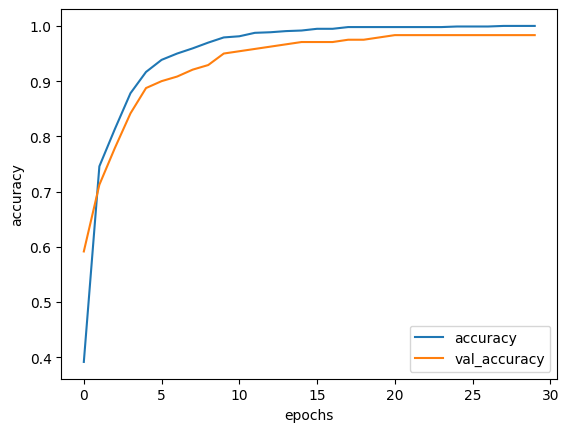

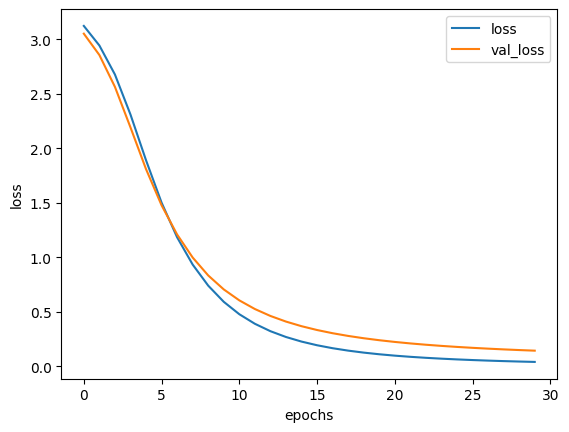

In [137]:
# plotting Utility

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


plot_graphs(model_dense_history, 'accuracy')
plot_graphs(model_dense_history, 'loss')

In [138]:
# load the best model (determined by validation accuracy)

from tensorflow.keras.models import load_model

model_dense_loaded=load_model(checkpoint_path)

In [139]:
# evaluate on whole validation dataset
model_dense_loaded.evaluate(valid_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9760 - loss: 0.2438  


[0.22415941953659058, 0.9833333492279053]

In [148]:
# make predictions (prediction probabilities for each class)

model_dense_pred_probs= model_dense_loaded.predict(valid_dataset)

# convert pred probs to classes
model_dense_preds=tf.argmax(model_dense_pred_probs, axis=1).numpy()
model_dense_preds

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([11, 12, 15, 23, 10,  0,  7,  6, 15, 12, 18, 18, 20, 11, 10,  5,  1,
       20, 13,  2, 22,  6, 18, 21, 14,  2, 10, 10,  9, 23, 19,  2,  7, 22,
       18,  6,  6, 12,  6, 22, 20, 10,  0,  3, 21, 20,  8, 16, 23,  3,  8,
        6, 23, 16,  4,  0,  9,  7,  3, 22,  0, 14, 23,  0, 16,  8, 14,  6,
       18, 22,  6, 13, 12, 15,  2,  7, 11, 11, 10,  2,  4,  3, 22, 22,  8,
       11,  9, 22, 15,  0, 17, 13,  8, 19,  5, 23,  7,  1, 17,  1, 23, 12,
       21,  3, 22,  8, 10, 20,  7,  6, 23,  8,  0, 12, 23,  3,  7, 14,  9,
        5,  4, 11,  9, 14, 14, 12,  5, 13,  6, 16,  1, 16, 12,  4, 22,  5,
       20,  0, 22, 16, 13, 11, 18,  1,  4, 18, 16, 17, 18, 12, 15,  3, 23,
       19,  2,  1, 16,  3, 12, 19, 10,  2,  9, 15, 15,  4, 10,  9,  7, 15,
        0,  9,  3, 14, 14, 13,  6,  3, 18, 23,  4, 19, 22, 23, 20, 22,  0,
       19, 10, 18, 10,  4, 21, 19, 21, 10, 18, 22, 14, 10,  4,  0,  8, 21,
       15, 12, 19, 17, 23,  8, 12,  4,  2,  2, 23, 21, 14,  2, 17,  1, 21,
        2,  9,  9, 10, 14

In [149]:
model_dense_results=evaluation_results(y_true=y_valid_le,
                                       y_pred=model_dense_preds)
model_dense_results

{'accuracy': 0.9833333333333333,
 'precision': 0.9849563341750842,
 'recall': 0.9833333333333333,
 'f1': 0.9830921257391846}

#Model_2: Model_LSTM

In [151]:
# define LSTM model

tf.random.set_seed(42)
model_1LSTM_embedding=layers.Embedding(input_dim=len(words_in_vocab),
                                       output_dim=128,
                                       embeddings_initializer='uniform',
                                       input_length=max_length,
                                       name='embedding_2')

inputs= layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x=model_1LSTM_embedding(x)
x=layers.LSTM(64, return_sequences=True)(x)
x=layers.LSTM(64)(x)
x=layers.Dense(64, activation='relu')(x)
outputs=layers.Dense(num_classes, activation='softmax')(x)
model_1LSTM=tf.keras.Model(inputs, outputs, name='model_1LSTM')

model_1LSTM.compile(loss='categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

model_1LSTM.summary()

Model: "model_1LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_3                 │ (None, 25)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 25, 128)             │         136,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 25, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 24)                  │           1,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,472 (876.84 KB)

 Trainable params: 224,472 (876.84 KB)

 Non-trainable params: 0 (0.00 B)

In [161]:
# define the checkpoint path
checkpoint_path='/content/Mydrive/MyDrive/TensorFlow_data/best_model_LSTM.keras'
cc=creat_checkpoint_callback(checkpoint_path)

In [162]:
# fit model
model_1LSTM_history= model_1LSTM.fit(train_dataset,
                                     epochs=30,
                                     validation_data= valid_dataset,
                                     callbacks=[cc])

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 1.0000 - loss: 0.0067
Epoch 1: val_accuracy improved from -inf to 0.84167, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_LSTM.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.8417 - val_loss: 0.8778
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.0059
Epoch 2: val_accuracy did not improve from 0.84167
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 1.0000 - loss: 0.0060 - val_accuracy: 0.8417 - val_loss: 0.8898
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.0053
Epoch 3: val_accuracy did not improve from 0.84167
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.8375 - val_loss: 0.9015
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.0049
Epoch 4: val_accuracy did not improve from 0.84167
30/30 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

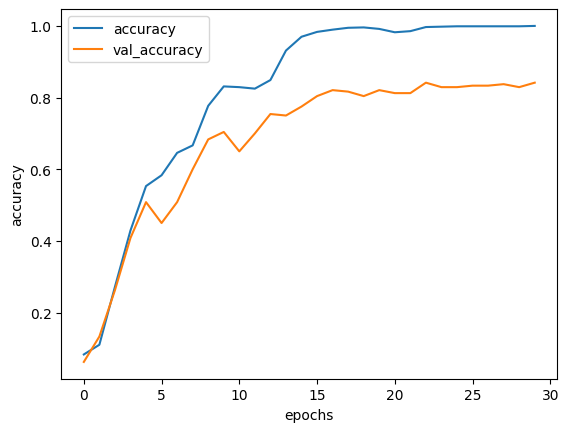

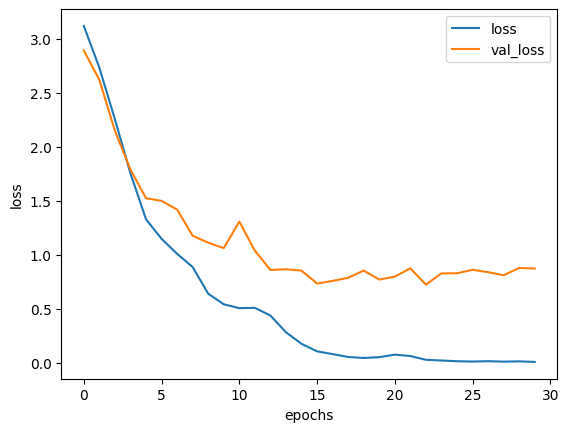

In [154]:
# plot the accuracy and loss history

plot_graphs(model_1LSTM_history, 'accuracy')
plot_graphs(model_1LSTM_history, 'loss')

In [155]:
model_1LSTM_loaded= load_model(checkpoint_path)

In [156]:
model_1LSTM_loaded.evaluate(valid_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8401 - loss: 0.6631


[0.7249326705932617, 0.8416666388511658]

In [158]:
# make predictions (prediction probabilities)
model_1LSTM_pred_probs=model_1LSTM_loaded.predict(valid_dataset)

# covert probabilities to classes
model_1LSTM_preds=tf.argmax(model_1LSTM_pred_probs, axis=1).numpy()

# calculate the LSTM model results
model_1LSTM_results=evaluation_results(y_true=y_valid_le,
                                       y_pred=model_1LSTM_preds)
model_1LSTM_results

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


{'accuracy': 0.8416666666666667,
 'precision': 0.8536302297239796,
 'recall': 0.8416666666666667,
 'f1': 0.8410305283024861}

In [159]:
# compare LSTM model to baseline model

compare_baseline_to_new_model(baseline_results, model_1LSTM_results)

Baseline accuracy: 0.93, Newaccuracy: 0.84, Difference: -0.09
Baseline precision: 0.95, Newprecision: 0.85, Difference: -0.10
Baseline recall: 0.93, Newrecall: 0.84, Difference: -0.09
Baseline f1: 0.93, Newf1: 0.84, Difference: -0.09


# Model_3: Bidirectional LSTM

In [163]:
# define LSTM model

tf.random.set_seed(42)
model_LSTM_embedding=layers.Embedding(input_dim=len(words_in_vocab),
                                       output_dim=128,
                                       embeddings_initializer='uniform',
                                       input_length=max_length,
                                       name='embedding_2')

inputs= layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x=model_LSTM_embedding(x)
x=layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
x=layers.Dense(512, activation='relu')(x)
outputs= layers.Dense(num_classes, activation='softmax')(x)

model_LSTM=tf.keras.Model(inputs, outputs, name='model_LSTM')

model_LSTM.compile(loss='categorical_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

model_LSTM.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_3                 │ (None, 25)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_2 (Embedding)              │ (None, 25, 128)             │         136,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 25, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,312 (1.57 MB)

 Trainable params: 412,312 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [164]:
# define the checkpoint path
checkpoint_path='/content/Mydrive/MyDrive/TensorFlow_data/best_model_Bi_LSTM.keras'
cc=creat_checkpoint_callback(checkpoint_path)

In [165]:
model_LSTM_history=model_LSTM.fit(train_dataset,
                                  epochs=30,
                                  validation_data=valid_dataset,
                                  callbacks=[cc])

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.0834 - loss: 3.1432
Epoch 1: val_accuracy improved from -inf to 0.11667, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_Bi_LSTM.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.0838 - loss: 3.1406 - val_accuracy: 0.1167 - val_loss: 2.7653
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.2366 - loss: 2.4787
Epoch 2: val_accuracy improved from 0.11667 to 0.44167, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_Bi_LSTM.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.2393 - loss: 2.4709 - val_accuracy: 0.4417 - val_loss: 1.7105
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.6052 - loss: 1.3016
Epoch 3: val_accuracy improved from 0.44167 to 0.69583, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_Bi_LSTM.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - accuracy: 0.6065 - loss: 1.2975 - val_accuracy: 0.695

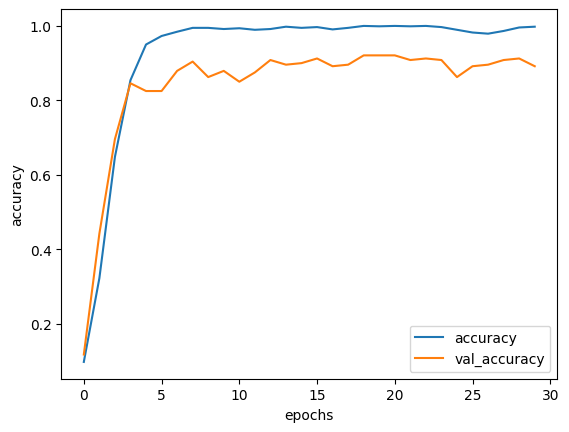

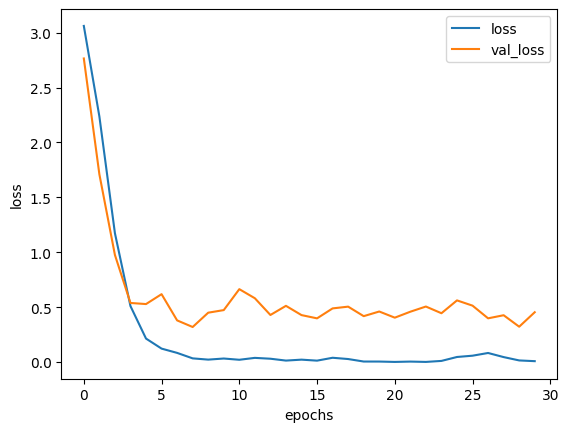

In [166]:
# plots
plot_graphs(model_LSTM_history, 'accuracy')
plot_graphs(model_LSTM_history, 'loss')

In [167]:
model_LSTM_loaded=load_model(checkpoint_path)

In [168]:
model_LSTM_loaded.evaluate(valid_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9180 - loss: 0.4381


[0.4182506501674652, 0.9208333492279053]

In [169]:
model_LSTM.evaluate(valid_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8766 - loss: 0.5917


[0.45413321256637573, 0.8916666507720947]

In [171]:
# predictions
model_LSTM_pred_probs=model_LSTM_loaded.predict(valid_dataset)
model_LSTM_pred=tf.argmax(model_LSTM_pred_probs, axis=1).numpy()

model_LSTM_results=g=evaluation_results(y_true= y_valid_le,
                                        y_pred= model_LSTM_pred)

model_LSTM_results

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 369ms/step


{'accuracy': 0.9208333333333333,
 'precision': 0.9303370356495357,
 'recall': 0.9208333333333333,
 'f1': 0.920980348684683}

# Model_4: model_GRU

In [173]:
# create model_GRU
tf.random.set_seed(42)
model_GRU_embedding=layers.Embedding(input_dim=len(words_in_vocab),
                                     output_dim=300,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_GRU')

# build an RNN using GRU cell
inputs=layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x=model_GRU_embedding(x)
x=layers.GRU(512, return_sequences=True)(x)
x=layers.GRU(64)(x)
x=layers.Dense(64, activation='relu')(x)
outputs=layers.Dense(num_classes, activation='softmax')(x)
model_GRU= tf.keras.Model(inputs, outputs, name='model_GRU')

model_GRU.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

model_GRU.summary()

Model: "model_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_3                 │ (None, 25)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_GRU (Embedding)            │ (None, 25, 300)             │         319,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 25, 512)             │       1,250,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 64)                  │         110,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 24)                  │           1,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,686,500 (6.43 MB)

 Trainable params: 1,686,500 (6.43 MB)

 Non-trainable params: 0 (0.00 B)

In [174]:
# define the checkpoint path
checkpoint_path='/content/Mydrive/MyDrive/TensorFlow_data/best_model_GRU.keras'
cc=creat_checkpoint_callback(checkpoint_path)

model_GRU_history=model_GRU.fit(train_dataset,
                                epochs=30,
                                validation_data=valid_dataset,
                                callbacks=[cc])

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.0619 - loss: 3.1818
Epoch 1: val_accuracy improved from -inf to 0.09583, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_GRU.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 622ms/step - accuracy: 0.0617 - loss: 3.1812 - val_accuracy: 0.0958 - val_loss: 3.0503
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.0806 - loss: 2.9687
Epoch 2: val_accuracy improved from 0.09583 to 0.14167, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_GRU.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 711ms/step - accuracy: 0.0808 - loss: 2.9662 - val_accuracy: 0.1417 - val_loss: 2.6944
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.2055 - loss: 2.5246
Epoch 3: val_accuracy improved from 0.14167 to 0.22500, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_GRU.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 637ms/step - accuracy: 0.2061 - loss: 2.5208 - val_accuracy: 0.2250 - val_lo

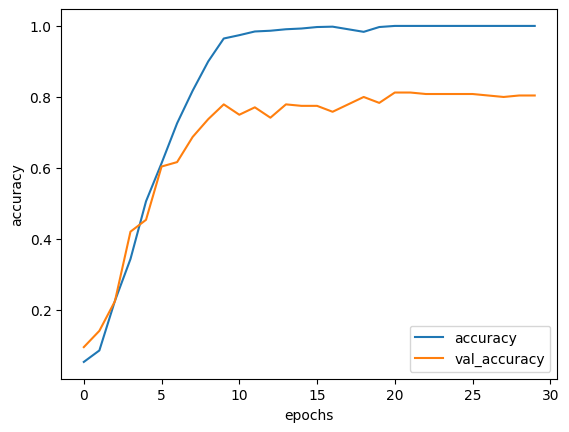

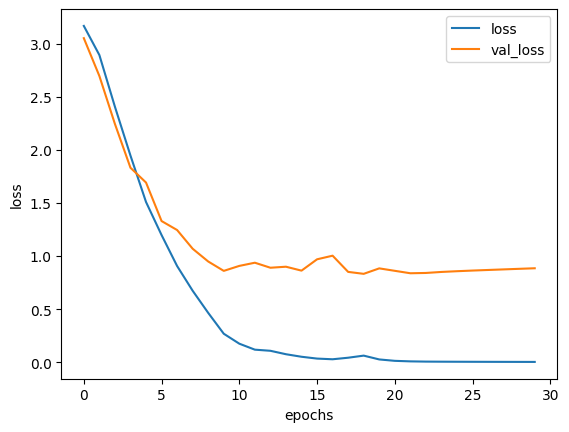

In [175]:
# plotting
plot_graphs(model_GRU_history, 'accuracy')
plot_graphs(model_GRU_history, 'loss')

In [177]:
model_GRU_loaded=load_model(checkpoint_path)
model_GRU_loaded.evaluate(valid_dataset)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.8033 - loss: 0.9649


[0.8606652021408081, 0.8125]

In [178]:
model_GRU_pred_probs=model_GRU_loaded.predict(valid_dataset)
model_GRU_preds=tf.argmax(model_GRU_pred_probs, axis=1).numpy()

model_GRU_results=evaluation_results(y_valid_le,
                                     model_GRU_preds)
model_GRU_results

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step


{'accuracy': 0.8125,
 'precision': 0.8299549755799756,
 'recall': 0.8125,
 'f1': 0.8106234261761297}

# Model_Conv1D

In [180]:
# create model_conv
tf.random.set_seed(42)

embedding_conv=layers.Embedding(input_dim=len(words_in_vocab),
                                output_dim=128,
                                embeddings_initializer='uniform',
                                input_length=max_length,
                                name='embedding_3')


inputs=layers.Input(shape=(1,), dtype='string')
x=text_vectorizer(inputs)
x=embedding_conv(x)
x=layers.Conv1D(64, 5, activation='relu')(x)
x=layers.GlobalAveragePooling1D()(x)
x=layers.Dense(512, activation='relu')(x)
outputs=layers.Dense(num_classes, activation='softmax')(x)

model_conv=tf.keras.Model(inputs, outputs, name= 'model_conv')

model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_conv.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

model_conv.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "model_conv"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_3                 │ (None, 25)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 25, 128)             │         136,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 21, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,936 (870.84 KB)

 Trainable params: 222,936 (870.84 KB)

 Non-trainable params: 0 (0.00 B)

In [181]:
# define the checkpoint path
checkpoint_path='/content/Mydrive/MyDrive/TensorFlow_data/best_model_conv.keras'
cc=creat_checkpoint_callback(checkpoint_path)

model_conv_history=model_conv.fit(train_dataset,
                                epochs=30,
                                validation_data=valid_dataset,
                                callbacks=[cc])

Epoch 1/30
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0647 - loss: 3.1696
Epoch 1: val_accuracy improved from -inf to 0.11667, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_conv.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.0691 - loss: 3.1667 - val_accuracy: 0.1167 - val_loss: 3.0280
Epoch 2/30
27/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2222 - loss: 2.8121
Epoch 2: val_accuracy improved from 0.11667 to 0.30833, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_conv.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2262 - loss: 2.7868 - val_accuracy: 0.3083 - val_loss: 2.1938
Epoch 3/30
28/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4314 - loss: 1.8782
Epoch 3: val_accuracy improved from 0.30833 to 0.59167, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_conv.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4370 - loss: 1.8651 - val_accuracy: 0.5917 - val_loss: 1.

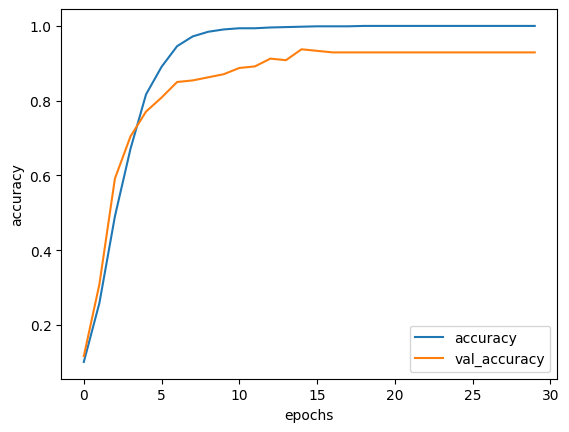

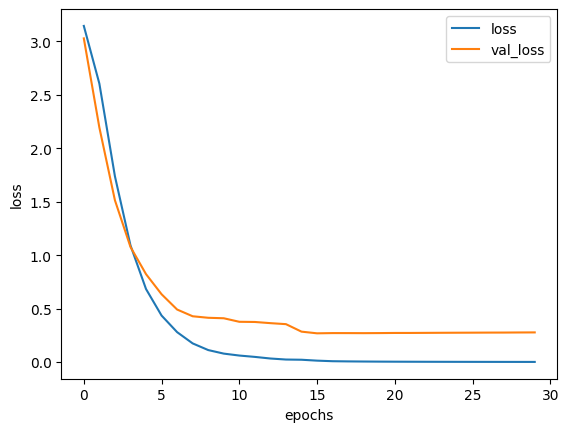

In [184]:
plot_graphs(model_conv_history, 'accuracy')
plot_graphs(model_conv_history,'loss')

In [185]:
model_conv_loaded=load_model(checkpoint_path)
model_conv_loaded.evaluate(valid_dataset)

model_conv_pred_probs=model_conv_loaded.predict(valid_dataset)
model_conv_preds=tf.argmax(model_conv_pred_probs, axis=1).numpy()

model_conv_results=evaluation_results(y_valid_le,
                                      model_conv_preds)
model_conv_results

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9344 - loss: 0.2603  


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


{'accuracy': 0.9375,
 'precision': 0.9430670082232582,
 'recall': 0.9375,
 'f1': 0.9377543690482313}

# comparing models

In [202]:
all_model_results= pd.DataFrame({'baseline': baseline_results,
                                 'simple Dense': model_dense_results,
                                 'LSTM': model_1LSTM_results,
                                 'Bidirectional LSTM': model_LSTM_results,
                                 'GRU': model_GRU_results,
                                 'Conv1D': model_conv_results})

all_model_results=all_model_results.transpose()
all_model_results.sort_values(by='accuracy')

,accuracy,precision,recall,f1
GRU,0.812500,0.829955,0.812500,0.810623
LSTM,0.841667,0.853630,0.841667,0.841031
Bidirectional LSTM,0.920833,0.930337,0.920833,0.920980
baseline,0.933333,0.953066,0.933333,0.929253
Conv1D,0.937500,0.943067,0.937500,0.937754
simple Dense,0.983333,0.984956,0.983333,0.983092


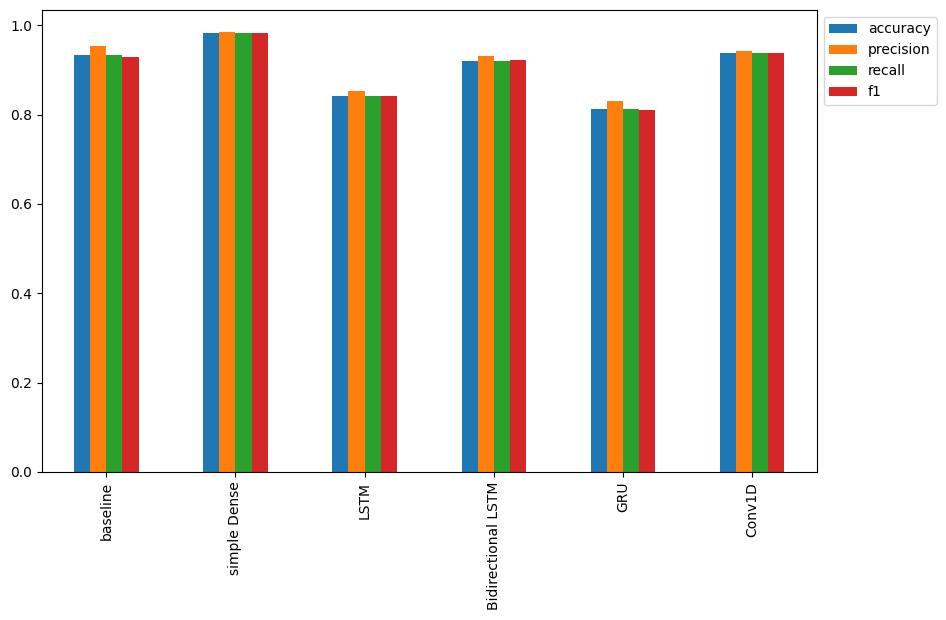

In [205]:
all_model_results.plot(kind="bar", figsize=(10, 6)).legend(bbox_to_anchor=(1.0, 1.0));

<Axes: >

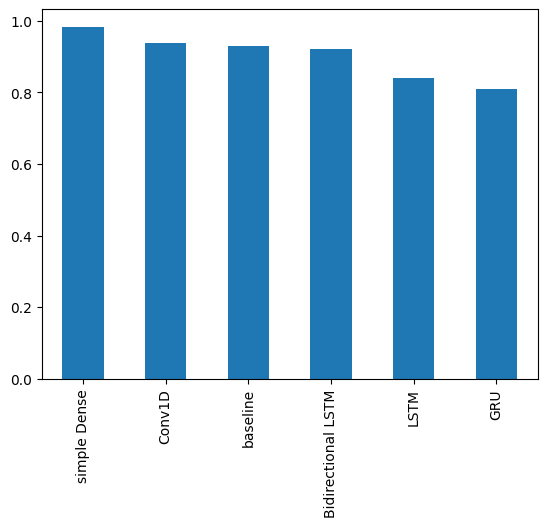

In [206]:
all_model_results.sort_values('f1', ascending=False)['f1'].plot(kind='bar')